In [2]:
import pandas as pd
import sqlite3

In [3]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite copy')

## • run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [4]:
query_datetime = """
SELECT checker.uid AS user, checker.timestamp AS 'datetime'
FROM checker
WHERE checker.uid LIKE 'user_%'
"""

dataframe_views = pd.io.sql.read_sql(query_datetime, con, parse_dates=['datetime'])
dataframe_views

,user,datetime
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## • using Pandas, create a new dataframe where the visits are counted and grouped by date

[pandas.Series.dt.floor](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.floor.html)
[frequency aliases](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases)

In [5]:
dataframe_views['date'] = dataframe_views['datetime'].dt.floor('D')
dataframe_views['time'] = pd.to_datetime(dataframe_views['datetime']).dt.hour
dataframe_views['daytime'] = pd.cut(dataframe_views['time'], bins=[0, 4, 10, 17, 24], labels=['night', 'morning', 'afternoon', 'evening'])
dataframe_views

,user,datetime,date,time,daytime
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5,morning
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5,morning
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5,morning
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5,morning
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5,morning
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20,evening
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20,evening
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20,evening
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20,evening


In [6]:
group_daytime = dataframe_views.groupby('daytime').date.value_counts().unstack(0)
group_daytime

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,NaN,13.0,10.0,NaN
2020-04-18,NaN,1.0,40.0,28.0
2020-04-19,NaN,11.0,9.0,11.0
2020-04-20,NaN,NaN,15.0,10.0
2020-04-21,NaN,NaN,9.0,16.0
2020-04-22,NaN,NaN,4.0,24.0
2020-04-23,NaN,6.0,15.0,20.0
2020-04-24,NaN,2.0,12.0,2.0
2020-04-25,1.0,21.0,48.0,34.0


## • using Pandas method .plot(), create a graph


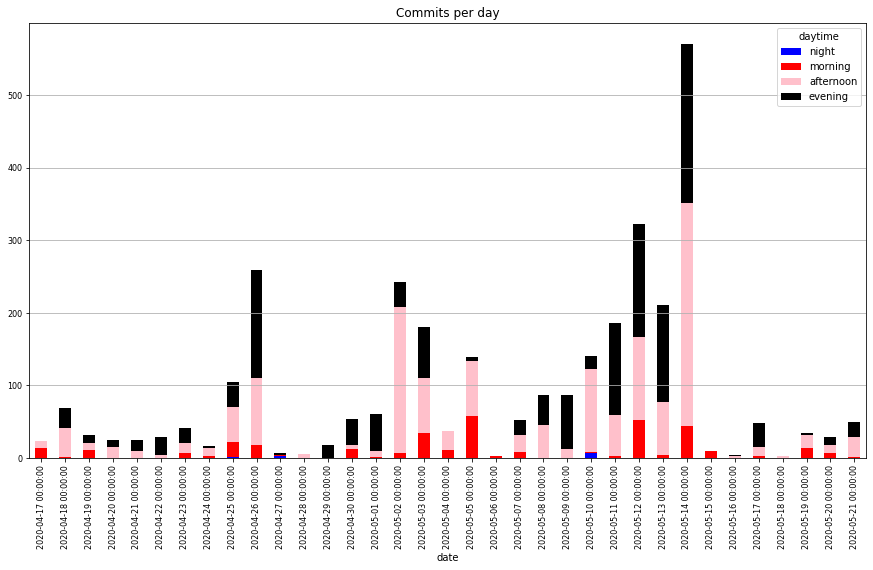

In [11]:
plot_views_commits =group_daytime.plot.bar(fontsize=8,
           figsize=(15, 8),
           title='Commits per day',
           stacked=True,
           color={"night" : "blue", "morning" : "red", "afternoon" : "pink", "evening" : "black"},
           )
plot_views_commits.grid(axis='y')

In [ ]:
con.close()

“When do our users usually commit the labs: in the night, morning, afternoon,
or evening?

-afternoon

Which day has:

∗ the most number of commits - 2020.05.14

∗ and at the same time, the number of commits in the evening is higher
than in the afternoon? - 2020.05.12